# Question 1

#### Open a file using glob
#### Get the list of words and their frequencies and arrange in decending order
#### Storing the final output in a csv file
#### Generate a log-log plot
#### Conclusion

In [77]:
import string, re, operator, glob, csv, numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

all_lines = []
for filename in glob.glob(r'C:\Users\infer\AppData\Roaming\nltk_data\corpora\gutenberg\*.txt')[:]:
    with open(filename) as f:
        all_lines.extend([line[:-1] for line in f.readlines() if line[:-1] != ''])
all_lines = [line.lower() for line in all_lines]                                 #to make all words lowercase
# print(all_lines)

In [78]:
#Function to remove all punctuations
def removePunc(list_var):
    list_var = ' '.join(singular for singular in list_var)
    a_single_string = ''.join(ch if ch not in set(string.punctuation) else ' ' for ch in list_var)    #Return a single string
    
    #Call labmda extression from function
    return remove_numbers_lam(a_single_string)

#Lambda expression to remove numbers
remove_numbers_lam = lambda value: re.sub(r'\d+', '', value).strip()

#Not calling this lambda function as we need all the stopwords in this example
#Zipf law says according to Wikipedia and gutenberg corpus "the","of","I" are the top three words used in day to day lives and top 25 words are almost all stopwords
#Lambda expression to remove stopwords
remove_stop_words_lam = lambda single_string, all_stopwords: [word for word in single_string.split() if word not in all_stopwords]

stop = stopwords.words('english')
aString = removePunc(all_lines)

#Didn't remove stop words
# all_words = remove_stop_words_lam(aString, stop)

all_words = aString.split() 

In [79]:
word_dict = {}
for word in all_words:              #Check whether the current word in context is present in the dictionary
    if word in word_dict:          #If it is present, increment the count for that word
        word_dict[word] +=1
    else:                           #Else add it to dictionary
        word_dict[word] = 1

#Sort the dictionary according to values
sorted_words_dict = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)

#Sort the words with same frequency alphabetically
sorted_List = sorted(sorted_words_dict, key=lambda val: (-val[1], val[0]))

In [80]:
#Rank the words
def rank_the_words(list_of_sorted_words):
    ranked_words_list = []
    rank = 1;
    # word, rank, frequency
    for entry in list_of_sorted_words:
        string_entry = entry[0]+','+str(rank)+','+str(entry[1])
        rank+=1
        ranked_words_list.append(string_entry)
    return ranked_words_list

#Call the function to get list of word, rank, frequency
all_words_list = rank_the_words(sorted_List)

In [81]:
#Create word_rank.csv file and open in write
with open('word_rank.csv', 'wt') as csvoutput:
    
    #Set delimited as , ;line limiter as \n; quote to none
    writer = csv.writer(csvoutput, delimiter=',', quoting=csv.QUOTE_NONE, lineterminator='\n')
    
    #Title row
    writer.writerow(("Word", 'Rank', 'Frequency'))
    for row in all_words_list:
        element = row.split(',')
        writer.writerow(element)
    
    #Close the output connection
    csvoutput.close()

In [82]:
#Read the csv file
reading_input = []
with open('word_rank.csv', 'r') as csv_input:
    reader = csv.reader(csv_input)
    row = next(reader)
    for row in reader:
        reading_input.append(row[:])

#separate out all individual lists for x and y axes and words for lables
x_val = []
y_val = []
words = []

for row in reading_input:
    words.append(row[0])
    x_val.append(int(row[1]))
    y_val.append(int(row[2]))

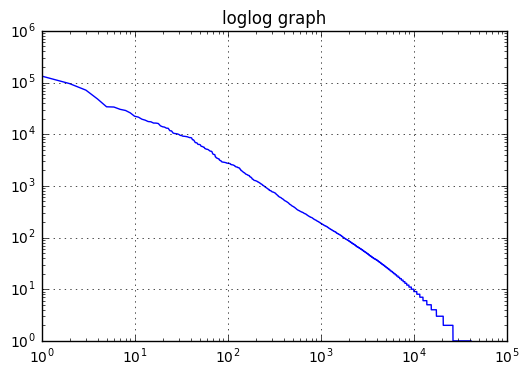

In [83]:
#Plot the log log graph with base to 10 for both axes
plt.loglog(x_val, y_val, basex=10, basey=10, color='blue')    #Graph type with values for both axes
plt.grid(True)                                                #Show grid
plt.title('loglog graph')                                     #Add title
plt.show()                                                    #Show graph

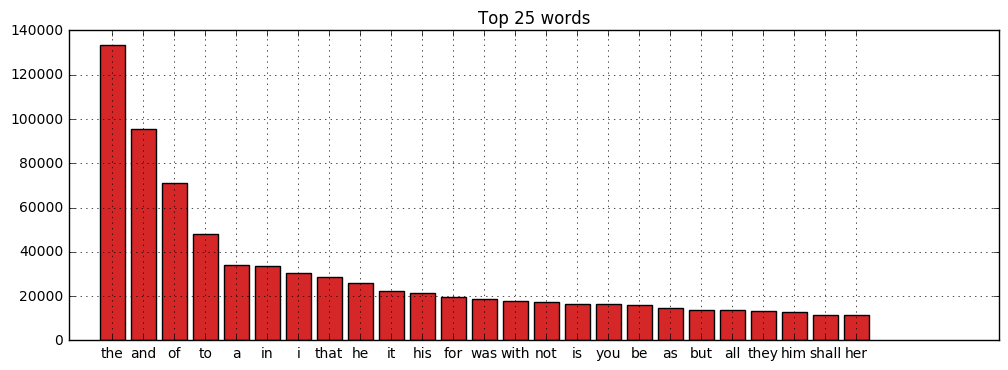

In [84]:
#Plot the bar graph showing top 25 words used with their respective frequencies
fig = plt.figure()
width = 0.8                                                            #Width of each bar
plt.bar(x_val[:25], y_val[:25], width = width, color='#d62728')        #Graph type with values for both axes
ind = np.arange(25)
plt.xticks(ind + width*1.75, words[:25])                               #Position of lables on x axis (words) 
plt.grid(True)                                                         #Show grid
plt.title('Top 25 words')                                              #Add title
fig.set_figwidth(12, 20)                                               #Graph width
plt.show()                                                             ##Show graph

# Conclusion:
#### According to the log-log plot, it is proved that zipf's law stands true.
#### The plot in red shows the top 25 words with their respective frequency and it again proves that top 20% words appear 80% of the time in text